Imports

In [1]:
import pandas as pd
import wordcloud
import nltk
import os
import matplotlib.pyplot as plt

Data loading

In [7]:
# Results of the survey
nps = pd.read_csv('C://Users//gabri//PycharmProjects//Klar//NPS//Data//NPS_Responses_01Abr.csv', parse_dates=['Submission Date'])

# Rename columns
original_columns = nps.columns.to_list()
nps.columns = ['Date', 'Source', 'Email', 'NPS', 'Cambios', 'Like', 'Disappeared', 'Usage', 'Confidence', 'Benefits', 'Reliable', 'Aid', 'Subm_ID', 'Week', 'Year']

c:\users\gabri\pycharmprojects\klar\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
nps = nps[(~nps.Source.isna()) & (nps.Source != 'test') & (~nps.NPS.isna())]
nps.head(15)

,Date,Source,Email,NPS,Cambios,Like,Disappeared,Usage,Confidence,Benefits,Reliable,Aid,Subm_ID,Week,Year
0,2020-01-24 15:26:12,email1-jan,earm@infinitummail.com,1.0,Tardan un mes en enviar las tarjetas. Mandas m...,NaN,?„ Indiferente / Ya no uso el product,No la uso.,NaN,NaN,NaN,NaN,4.557104e+18,1,NaN
1,2020-01-24 15:26:36,email1-jan,luge.bernabe@gmail.com,7.0,Que se pueda depositar en más establecimientos...,NaN,? Neutral (No es tan útil),Es una cuenta secundaria.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
2,2020-01-24 15:26:39,email1-jan,javierruiz6890@gmail.com,8.0,NaN,Asta ora todo,?¥ Algo decepcionado/a,La uso muy poco.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
3,2020-01-24 15:26:44,email1-jan,laimirdavila@gmail.com,6.0,Mejorar las transferencias bancos-klar,NaN,? Neutral (No es tan útil),Es una cuenta secundaria.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
4,2020-01-24 15:26:58,email1-jan,seguricom@gmail.com,10.0,NaN,La rapidez de las trasferencias bancarias,?° Muy decepcionado/a,Es mi cuenta principal.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
5,2020-01-24 15:27:08,email1-jan,mariiemendez330@gmail.com,10.0,NaN,Que es muy fácil hacer transferencia,?° Muy decepcionado/a,Es mi cuenta principal.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
6,2020-01-24 15:27:19,email1-jan,estradaadaan@gmail.com,10.0,NaN,La facilidad de hacer las transferencias banca...,?¥ Algo decepcionado/a,Es mi cuenta principal.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
7,2020-01-24 15:27:24,email1-jan,rubencastillot12@gmail.com,8.0,NaN,La estetica de la tarjeta y sencillez de como ...,?¥ Algo decepcionado/a,La uso muy poco.,NaN,NaN,NaN,NaN,4.557104e+18,1,2020.0
8,2020-01-24 15:27:42,email1-jan,oscar.olivares9311@gmail.com,9.0,NaN,Cashback,?¥ Algo decepcionado/a,Es mi cuenta principal.,NaN,NaN,NaN,NaN,4.557105e+18,1,2020.0
9,2020-01-24 15:27:51,email1-jan,jona_89_4@hotmail.com,10.0,NaN,Todos sus beneficios que tienen y poder agrega...,?° Muy decepcionado/a,Es mi cuenta principal.,NaN,NaN,NaN,NaN,4.557105e+18,1,2020.0


In [12]:
df = nps[['Date','Source', 'Email', 'NPS', 'Cambios', 'Like', 'Disappeared', 'Usage']]
df.shape

(43122, 8)

Create type of user

In [13]:
df['Type'] = df['NPS'].apply(lambda x: 'Detractor' if x <=6 else ('Neutral' if x <=8 else 'Ambassador'))
df.head()

C:\Users\gabri\AppData\Local\Temp/ipykernel_12276/3056428944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['NPS'].apply(lambda x: 'Detractor' if x <=6 else ('Neutral' if x <=8 else 'Ambassador'))


,Date,Source,Email,NPS,Cambios,Like,Disappeared,Usage,Type
0,2020-01-24 15:26:12,email1-jan,earm@infinitummail.com,1.0,Tardan un mes en enviar las tarjetas. Mandas m...,NaN,?„ Indiferente / Ya no uso el product,No la uso.,Detractor
1,2020-01-24 15:26:36,email1-jan,luge.bernabe@gmail.com,7.0,Que se pueda depositar en más establecimientos...,NaN,? Neutral (No es tan útil),Es una cuenta secundaria.,Neutral
2,2020-01-24 15:26:39,email1-jan,javierruiz6890@gmail.com,8.0,NaN,Asta ora todo,?¥ Algo decepcionado/a,La uso muy poco.,Neutral
3,2020-01-24 15:26:44,email1-jan,laimirdavila@gmail.com,6.0,Mejorar las transferencias bancos-klar,NaN,? Neutral (No es tan útil),Es una cuenta secundaria.,Detractor
4,2020-01-24 15:26:58,email1-jan,seguricom@gmail.com,10.0,NaN,La rapidez de las trasferencias bancarias,?° Muy decepcionado/a,Es mi cuenta principal.,Ambassador


Filters

In [14]:
start_date = '2022-03-01'
end_date = '2022-03-31'
type_filter = 'Detractor'
df_filter = (df.Date >= start_date) & (df.Date <= end_date) & (df.Type == type_filter)
df_filtered = df[df_filter]
df_filtered.head(10)

,Date,Source,Email,NPS,Cambios,Like,Disappeared,Usage,Type
40967,2022-03-01 01:10:41,email-1TXN,a.e.d.q.01@gmail.com,5.0,Poder activar la tarjeta en cajeros de otros b...,NaN,? Neutral (No es tan útil),No la uso.,Detractor
40968,2022-03-01 02:37:53,email-1TXN,gfsainz@gmail.com,6.0,Dar tarjetas de crédito,NaN,? Muy decepcionado/a,Es una tarjeta secundaria.,Detractor
40973,2022-03-01 08:40:30,email-1TXN,palandez@hotmail.com,5.0,La tarjeta no ha llegado y ha pasado más de 8 ...,NaN,? Neutral (No es tan útil),Es mi tarjeta principal.,Detractor
40975,2022-03-01 09:13:59,email-1TXN,martinezrochayulia@gmail.com,4.0,Dar el respaldo luego luego,NaN,? Muy decepcionado/a,Es mi tarjeta principal.,Detractor
40992,2022-03-01 14:02:18,email-1TXN,justojgeg@gmail.com,1.0,NaN,NaN,? Muy decepcionado/a,NaN,Detractor
40993,2022-03-01 14:07:28,email-1TXN,glamzone2021@gmail.com,5.0,Tengo buen historial y no me dieron el crédito...,NaN,? Neutral (No es tan útil),La uso muy poco.,Detractor
41003,2022-03-01 15:14:02,email-1TXN,ivannapolinar963@gmail.com,1.0,Pues dar lo k prometen en sus anuncios d la ta...,NaN,? Neutral (No es tan útil),NaN,Detractor
41009,2022-03-01 15:56:33,email-20TXN,lupis1964@hotmail.com,5.0,Que cumplan con lo que ofrecen. Por ejemplo el...,NaN,? Neutral (No es tan útil),Es una tarjeta secundaria.,Detractor
41011,2022-03-01 16:39:40,email-1TXN,vbahena646@gmail.com,1.0,No la e usado no puedo opinar,NaN,? Algo decepcionado/a,Es mi tarjeta principal.,Detractor
41026,2022-03-01 19:28:50,email-10TXN,fajuceaguiagui@gmail.com,5.0,Dejar de fallar la aplicación,NaN,? Muy decepcionado/a,Es una tarjeta secundaria.,Detractor


In [23]:
first_transaction = df_filtered[df_filtered.Source=='email-1TXN']
tenth_transaction = df_filtered[df_filtered.Source=='email-10TXN']
twentieth_transaction = df_filtered[df_filtered.Source=='email-20TXN']

Collapse "Columns to a string" column to single string

In [24]:
texts = {}
transactions = ['First_Transaction', 'Tenth_Transaction', 'Twentieth_Transaction']
dfs = [first_transaction, tenth_transaction, twentieth_transaction]
for idx,trans in enumerate(transactions):
    aux = dfs[idx]
    texts[trans] = str(tuple(aux[~aux['Cambios'].isna()]['Cambios'].tolist()))
del aux

In [25]:
print(texts['First_Transaction'])

('Poder activar la tarjeta en cajeros de otros bancos, o que se pueda activar desde la misma aplicación, para la aplicación opciones como recargar saldo y pagar servicios serían muy convenientes', 'Dar tarjetas de crédito', 'La tarjeta no ha llegado y ha pasado más de 8 días.', 'Dar el respaldo luego luego', 'Tengo buen historial y no me dieron el crédito no se si seguir ocupando esa tarjeta', 'Pues dar lo k prometen en sus anuncios d la tarjeta k viene kn prestamo o dinero n hacer otras cosas k n y si n lo van a cumplir n pongan eso en sus anuncios', 'No la e usado no puedo opinar', 'PUEDE HACER LA APLICACIÓN EN LA PANTALLA INICIAL LAS OPERACIONES QUE SE DESEA HACER', 'Aun  nontebpuwdondwcir puesto que no la he usado', 'No pues me párese exelente todo', 'Sistema de validación de ID más eficiente', 'Dar credito', 'Tener una opción para pago de tarjetas de crédito.', 'Asegurarse que la tarjeta física llegue al destino indicado', 'Tener un chat de soporte, no he podido usar mi tarjeta fí

Text Processing

In [17]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams, bigrams, trigrams
from collections import Counter


In [41]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
token_dict = {}
stop_words = stopwords.words('spanish')
for i,text in enumerate(texts.values()):
    print(text)
    word_punct_token = word_tokenize(text)
    clean_token=[]
    for token in word_punct_token:
        token = token.lower()
        # remove any value that are not alphabetical
        new_token = re.sub(r'[^a-zA-Z]+', '', token)
        # remove empty value and single character value
        if new_token != "" and len(new_token) >= 2:
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0: # remove line that only contains consonants
                clean_token.append(new_token)
    tokens = [x for x in clean_token if x not in stop_words]
    token_dict[transactions[i]] = tokens




('Poder activar la tarjeta en cajeros de otros bancos, o que se pueda activar desde la misma aplicación, para la aplicación opciones como recargar saldo y pagar servicios serían muy convenientes', 'Dar tarjetas de crédito', 'La tarjeta no ha llegado y ha pasado más de 8 días.', 'Dar el respaldo luego luego', 'Tengo buen historial y no me dieron el crédito no se si seguir ocupando esa tarjeta', 'Pues dar lo k prometen en sus anuncios d la tarjeta k viene kn prestamo o dinero n hacer otras cosas k n y si n lo van a cumplir n pongan eso en sus anuncios', 'No la e usado no puedo opinar', 'PUEDE HACER LA APLICACIÓN EN LA PANTALLA INICIAL LAS OPERACIONES QUE SE DESEA HACER', 'Aun  nontebpuwdondwcir puesto que no la he usado', 'No pues me párese exelente todo', 'Sistema de validación de ID más eficiente', 'Dar credito', 'Tener una opción para pago de tarjetas de crédito.', 'Asegurarse que la tarjeta física llegue al destino indicado', 'Tener un chat de soporte, no he podido usar mi tarjeta fí

Number of tokens

In [28]:
print(token_dict['First_Transaction'])

['poder', 'activar', 'tarjeta', 'cajeros', 'bancos', 'pueda', 'activar', 'misma', 'aplicacin', 'aplicacin', 'opciones', 'recargar', 'saldo', 'pagar', 'servicios', 'seran', 'convenientes', 'dar', 'tarjetas', 'crdito', 'tarjeta', 'llegado', 'pasado', 'das', 'dar', 'respaldo', 'luego', 'luego', 'buen', 'historial', 'dieron', 'crdito', 'si', 'seguir', 'ocupando', 'tarjeta', 'pues', 'dar', 'prometen', 'anuncios', 'tarjeta', 'viene', 'prestamo', 'dinero', 'hacer', 'cosas', 'si', 'van', 'cumplir', 'pongan', 'anuncios', 'usado', 'puedo', 'opinar', 'puede', 'hacer', 'aplicacin', 'pantalla', 'inicial', 'operaciones', 'desea', 'hacer', 'aun', 'nontebpuwdondwcir', 'puesto', 'usado', 'pues', 'prese', 'exelente', 'sistema', 'validacin', 'id', 'eficiente', 'dar', 'credito', 'tener', 'opcin', 'pago', 'tarjetas', 'crdito', 'asegurarse', 'tarjeta', 'fsica', 'llegue', 'destino', 'indicado', 'tener', 'chat', 'soporte', 'podido', 'usar', 'tarjeta', 'fsica', 'ninguna', 'dar', 'crditos', 'asignar', 'crdito',

Onegram

In [31]:
n_gram = 1

for key in token_dict.keys():
    n_gram_dic = dict(Counter(ngrams(token_dict[key], n_gram)))
    n_gram_dic_sorted = sorted(n_gram_dic.items(), key=lambda x: x[1], reverse=True)
    print(n_gram_dic_sorted)

[(('tarjeta',), 41), (('crdito',), 29), (('dar',), 15), (('si',), 9), (('dinero',), 7), (('pues',), 6), (('hacer',), 6), (('credito',), 6), (('tener',), 6), (('as',), 5), (('mas',), 5), (('poder',), 4), (('tarjetas',), 4), (('llegado',), 4), (('usado',), 4), (('puedo',), 4), (('aun',), 4), (('fsica',), 4), (('crditos',), 4), (('ofrecer',), 4), (('principio',), 4), (('mejorar',), 4), (('qu',), 4), (('est',), 4), (('tiempo',), 4), (('atencin',), 4), (('aplicacin',), 3), (('das',), 3), (('respaldo',), 3), (('historial',), 3), (('llegue',), 3), (('inicio',), 3), (('problemas',), 3), (('dan',), 3), (('dbito',), 3), (('tema',), 3), (('cmo',), 3), (('usarla',), 3), (('transferencias',), 3), (('tal',), 3), (('debito',), 3), (('entrega',), 3), (('bien',), 3), (('ninguno',), 3), (('activar',), 2), (('opciones',), 2), (('pagar',), 2), (('luego',), 2), (('anuncios',), 2), (('viene',), 2), (('van',), 2), (('cumplir',), 2), (('pongan',), 2), (('inicial',), 2), (('operaciones',), 2), (('opcin',), 2),

Bigrams

In [29]:
n_gram = 2

for key in token_dict.keys():
    n_gram_dic = dict(Counter(ngrams(token_dict[key], n_gram)))
    n_gram_dic_sorted = sorted(n_gram_dic.items(), key=lambda x: x[1], reverse=True)
    print(n_gram_dic_sorted)

[(('tarjeta', 'crdito'), 7), (('crdito', 'si'), 4), (('tarjeta', 'fsica'), 4), (('dar', 'crdito'), 4), (('crdito', 'tarjeta'), 3), (('tarjetas', 'crdito'), 2), (('tarjeta', 'llegado'), 2), (('dar', 'credito'), 2), (('crdito', 'as'), 2), (('tarjeta', 'dbito'), 2), (('si', 'tarjeta'), 2), (('puedo', 'dar'), 2), (('tal', 'tarjeta'), 2), (('llegado', 'tarjeta'), 2), (('est', 'bien'), 2), (('atencin', 'directa'), 2), (('tiempo', 'respuesta'), 2), (('poder', 'activar'), 1), (('activar', 'tarjeta'), 1), (('tarjeta', 'cajeros'), 1), (('cajeros', 'bancos'), 1), (('bancos', 'pueda'), 1), (('pueda', 'activar'), 1), (('activar', 'misma'), 1), (('misma', 'aplicacin'), 1), (('aplicacin', 'aplicacin'), 1), (('aplicacin', 'opciones'), 1), (('opciones', 'recargar'), 1), (('recargar', 'saldo'), 1), (('saldo', 'pagar'), 1), (('pagar', 'servicios'), 1), (('servicios', 'seran'), 1), (('seran', 'convenientes'), 1), (('convenientes', 'dar'), 1), (('dar', 'tarjetas'), 1), (('llegado', 'pasado'), 1), (('pasado

In [21]:
print(token_dict.keys())

dict_keys(['Cambios', 'Like', 'Disappeared', 'Usage'])


Trigrams

In [32]:
n_gram = 3

for key in token_dict.keys():
    n_gram_dic = dict(Counter(ngrams(token_dict[key], n_gram)))
    n_gram_dic_sorted = sorted(n_gram_dic.items(), key=lambda x: x[1], reverse=True)
    print(n_gram_dic_sorted)

[(('tarjeta', 'crdito', 'si'), 2), (('poder', 'activar', 'tarjeta'), 1), (('activar', 'tarjeta', 'cajeros'), 1), (('tarjeta', 'cajeros', 'bancos'), 1), (('cajeros', 'bancos', 'pueda'), 1), (('bancos', 'pueda', 'activar'), 1), (('pueda', 'activar', 'misma'), 1), (('activar', 'misma', 'aplicacin'), 1), (('misma', 'aplicacin', 'aplicacin'), 1), (('aplicacin', 'aplicacin', 'opciones'), 1), (('aplicacin', 'opciones', 'recargar'), 1), (('opciones', 'recargar', 'saldo'), 1), (('recargar', 'saldo', 'pagar'), 1), (('saldo', 'pagar', 'servicios'), 1), (('pagar', 'servicios', 'seran'), 1), (('servicios', 'seran', 'convenientes'), 1), (('seran', 'convenientes', 'dar'), 1), (('convenientes', 'dar', 'tarjetas'), 1), (('dar', 'tarjetas', 'crdito'), 1), (('tarjetas', 'crdito', 'tarjeta'), 1), (('crdito', 'tarjeta', 'llegado'), 1), (('tarjeta', 'llegado', 'pasado'), 1), (('llegado', 'pasado', 'das'), 1), (('pasado', 'das', 'dar'), 1), (('das', 'dar', 'respaldo'), 1), (('dar', 'respaldo', 'luego'), 1), 

Wordcloud

In [35]:
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

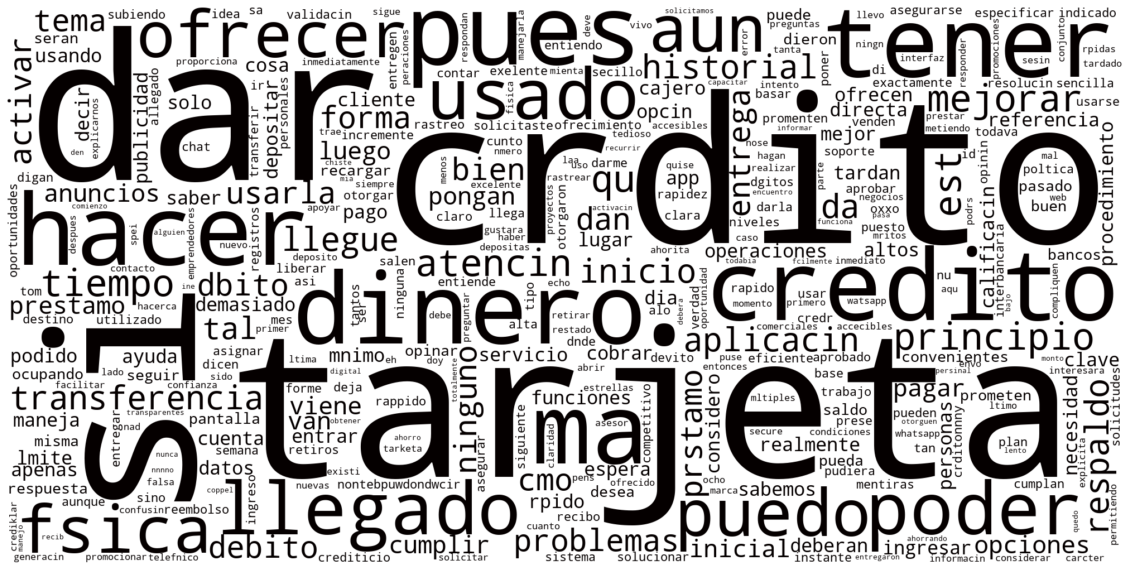

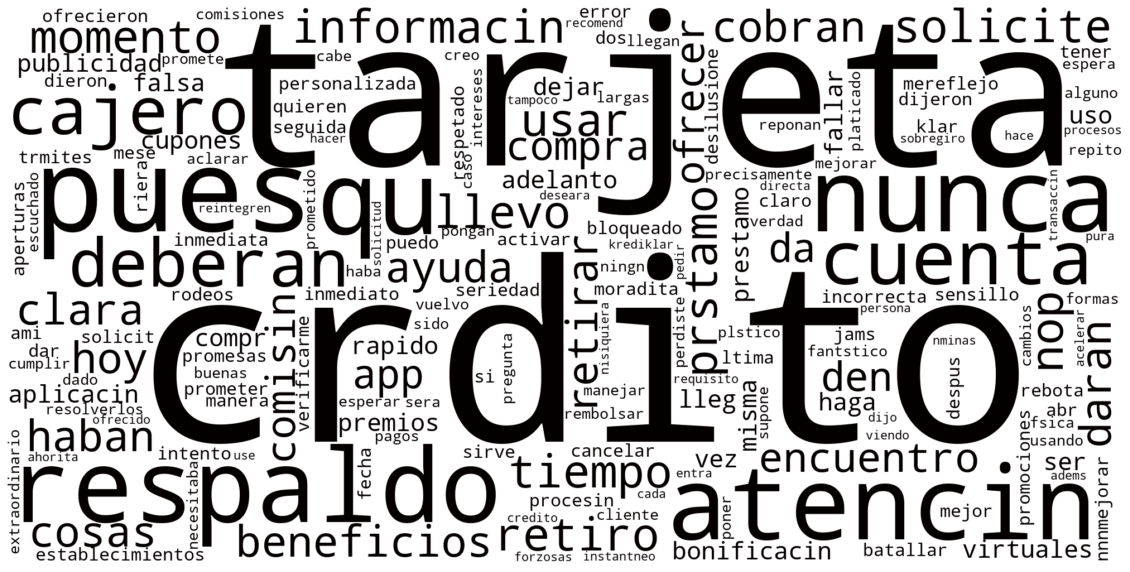

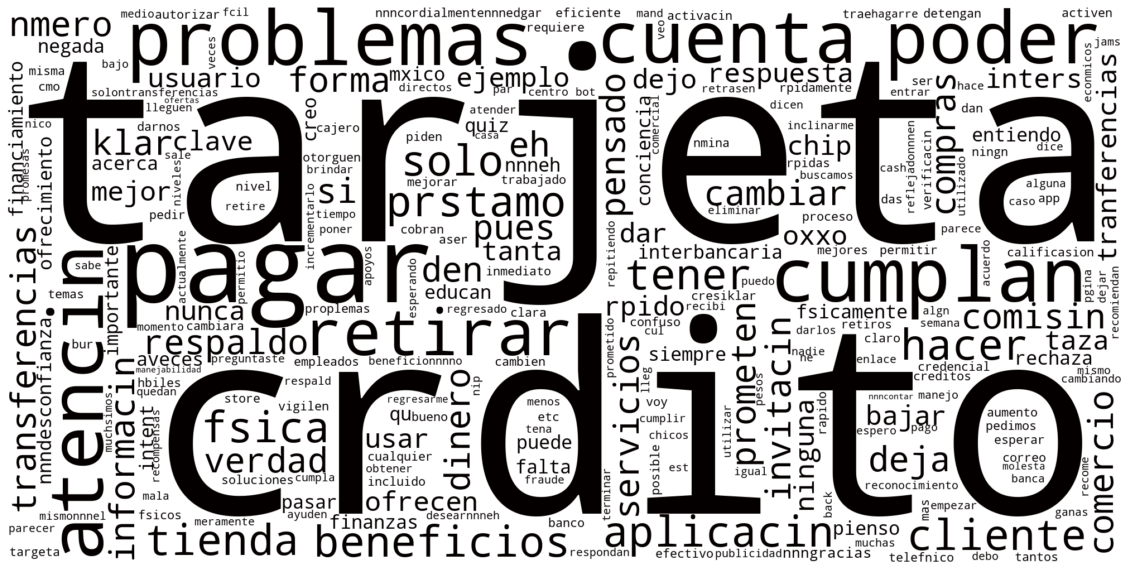

In [36]:
for key in token_dict.keys():
    wordcloud_pic = wordcloud.WordCloud(
        width=2000,
        height=1000,
        contour_color="black",
        max_words=500,
        relative_scaling = 0,
        background_color = "white").generate(" ".join(token_dict[key]))
    wordcloud_pic.recolor(color_func = black_color_func)
    plt.figure(figsize=[20,15])
    plt.imshow(wordcloud_pic, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(r'C:\Users\gabri\PycharmProjects\Klar\NPS\WordCloud\March_Detractor_'+key+'.png')